## <span style="font-family: Arial; font-weight:bold;font-size:2em;color:gold;"> COMPUTER VISION PROJECT

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:gold;"> -SAIF MERCHANT

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:cyan;"> Part A
* DOMAIN: Botanical Research
* CONTEXT: University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a
classifier capable of determining a plant's species from a photo.
* DATA DESCRIPTION: The dataset comprises of images from 12 plant species.
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.
* PROJECT OBJECTIVE: To create a classifier capable of determining a plant's species from a photo

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 1.A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python

In [1]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import zipfile
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers
from keras.models import load_model
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [4]:
zip_path_image_folder = "C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/plant-seedlings-classification (1).zip"
extract_path_image_folder = "C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/extracted_plant_images"

os.makedirs(extract_path_image_folder, exist_ok=True)

with zipfile.ZipFile(zip_path_image_folder, 'r') as zip_ref:
    zip_ref.extractall(extract_path_image_folder)

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 1.B.Map the images from train folder with train labels to form a DataFrame.

In [2]:
zip_path_image_folder = "C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/plant-seedlings-classification (1).zip"
extract_path_image_folder = "C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/extracted_plant_images"

os.makedirs(extract_path_image_folder, exist_ok=True)
with zipfile.ZipFile(zip_path_image_folder, 'r') as zip_ref:
    zip_ref.extractall(extract_path_image_folder)

def load_images_and_labels(folder_path):
    images = []
    labels = []
    for plant_type in os.listdir(folder_path):
        plant_type_path = os.path.join(folder_path, plant_type)
        if os.path.isdir(plant_type_path):
            for img_name in os.listdir(plant_type_path):
                img_path = os.path.join(plant_type_path, img_name)
                images.append(img_name)
                labels.append(plant_type)
    return images, labels

train_images_path = os.path.join(extract_path_image_folder, "plant-seedlings-classification/train")
image_names, labels = load_images_and_labels(train_images_path)

image_data = [cv2.imread(os.path.join(train_images_path, label, img_name)) for img_name, label in zip(image_names, labels)]

df = pd.DataFrame({"Image_Name": image_names, "Species": labels, "Image_Data": image_data})

df.head()

,Image_Name,Species,Image_Data
0,0050f38b3.png,Black-grass,"[[[27, 50, 80], [18, 42, 71], [36, 57, 83], [4..."
1,0183fdf68.png,Black-grass,"[[[37, 43, 55], [37, 43, 54], [40, 46, 57], [4..."
2,0260cffa8.png,Black-grass,"[[[24, 32, 45], [21, 30, 44], [22, 30, 45], [2..."
3,05eedce4d.png,Black-grass,"[[[51, 84, 108], [56, 89, 112], [54, 88, 110],..."
4,075d004bc.png,Black-grass,"[[[165, 162, 162], [165, 161, 163], [160, 157,..."


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 1.C. Write a function that will select n random images and display images along with its species.

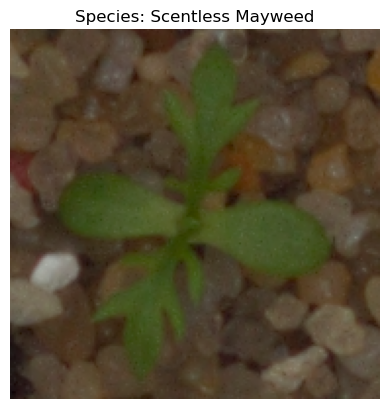

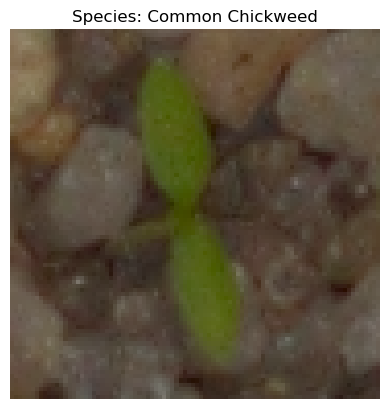

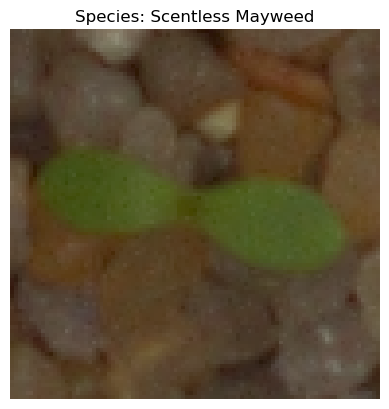

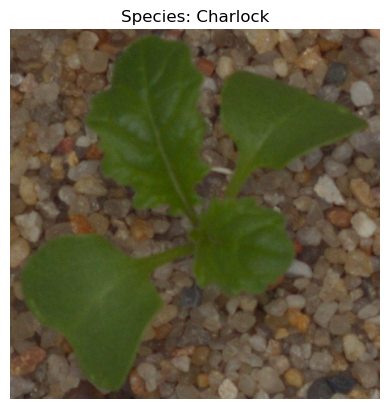

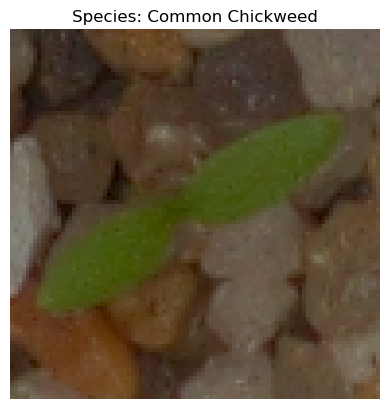

In [3]:
def display_random_images(df, n=5):
    random_rows = df.sample(n)
    
    for index, row in random_rows.iterrows():
        image_name = row['Image_Name']
        species = row['Species']
        image_data = row['Image_Data']
        plt.imshow(cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB))
        plt.title(f"Species: {species}")
        plt.axis('off')
        plt.show()

display_random_images(df, n=5)

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 2.A. Create X & Y from the DataFrame

In [4]:
X = df['Image_Data'].values
Y = df['Species'].values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X = np.array(X)

print("X shape:", X.shape)
print("Y shape:", Y_encoded.shape)

X shape: (4750,)
Y shape: (4750,)


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 2.B. Encode labels of the images

In [5]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)
print("Y_encoded shape:", Y_encoded.shape)

Label Mapping: {'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
Y_encoded shape: (4750,)


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 2.C. Unify shape of all the images. 

In [6]:
def resize_images(images, target_size=(64, 64)):
    return np.array([cv2.resize(img, target_size) for img in images])

X_resized = resize_images(X)

print("Shape of X_train_resized:", X_resized.shape)
print("Y_encoded shape:", Y_encoded.shape)

Shape of X_train_resized: (4750, 64, 64, 3)
Y_encoded shape: (4750,)


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 2.D. Normalise all the images.

In [7]:
X_normalized = X_resized / 255.0
print("Shape of X_train_normalized:", X_normalized.shape)

Shape of X_train_normalized: (4750, 64, 64, 3)


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 3.A. Split the data into train and test data

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (3800, 64, 64, 3)
Shape of X_test: (950, 64, 64, 3)
Shape of Y_train: (3800,)
Shape of Y_test: (950,)


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 3.B. Create new CNN architecture to train the model.

In [9]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 kernel_initializer='he_normal',
                 input_shape = (64,64,3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(128, activation='relu'))

model_cnn.add(Dense(12, activation='softmax'))

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 3.C.Train the model on train data and validate on test data.

In [10]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_cnn.fit(X_train, Y_train, epochs=25, validation_data=(X_test, Y_test))


Epoch 1/25


119/119 [==============================] - 14s 94ms/step - loss: 2.2588 - accuracy: 0.2155 - val_loss: 1.7161 - val_accuracy: 0.3926
Epoch 2/25
119/119 [==============================] - 10s 85ms/step - loss: 1.7478 - accuracy: 0.3768 - val_loss: 1.4866 - val_accuracy: 0.4063
Epoch 3/25
119/119 [==============================] - 10s 82ms/step - loss: 1.5633 - accuracy: 0.4429 - val_loss: 1.2982 - val_accuracy: 0.5463
Epoch 4/25
119/119 [==============================] - 10s 82ms/step - loss: 1.4073 - accuracy: 0.5089 - val_loss: 1.0509 - val_accuracy: 0.6432
Epoch 5/25
119/119 [==============================] - 10s 85ms/step - loss: 1.2294 - accuracy: 0.5782 - val_loss: 1.0183 - val_accuracy: 0.6737
Epoch 6/25
119/119 [==============================] - 10s 82ms/step - loss: 1.1213 - accuracy: 0.6179 - val_loss: 0.9166 - val_accuracy: 0.6926
Epoch 7/25
119/119 [==============================] - 10s 83ms/step - loss: 1.0032 - accuracy: 0.6487 - val_loss: 0.8505 - val_accura

In [11]:
test_loss, test_acc = model_cnn.evaluate(X_test, Y_test, verbose=2)
print("\nTest accuracy:", test_acc)
Y_pred = model_cnn.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = Y_test
print("\nClassification Report:")
print(classification_report(Y_test_classes, Y_pred_classes))

30/30 - 1s - loss: 0.7873 - accuracy: 0.8368 - 565ms/epoch - 19ms/step

Test accuracy: 0.8368421196937561
30/30 [==============================] - 1s 18ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        67
           1       0.96      0.86      0.91        79
           2       0.92      0.82      0.87        57
           3       0.92      0.97      0.95       125
           4       0.74      0.66      0.70        35
           5       0.77      0.94      0.85        80
           6       0.76      0.81      0.78       140
           7       0.89      0.74      0.81        46
           8       0.84      0.86      0.85        94
           9       0.84      0.86      0.85        42
          10       0.95      0.90      0.92       101
          11       0.84      0.86      0.85        84

    accuracy                           0.84       950
   macro avg       0.83      0.81      0.82       950
weig

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 3.D. Select a random image and print actual label and predicted label for the same

In [12]:
model_cnn.save('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part A//Part_A_Model.h5') 
model_cnn.save_weights('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part A//Part_A_Model_weights.h5') 
loaded_model_1 = load_model('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part A//Part_A_Model.h5')
loaded_model_1.load_weights('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part A//Part_A_Model_weights.h5')

C:\Users\SAIF\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Original Image Shape: (64, 64, 3)
--------------------
1/1 [==============================] - 0s 124ms/step
Predicted Probabilities: [9.5008239e-02 1.2406133e-06 5.3357476e-06 7.6390989e-04 3.7653244e-05
 7.9865724e-02 8.2112002e-01 5.1276482e-05 5.1347732e-05 5.8514502e-06
 2.8465465e-03 2.4281669e-04]
--------------------
Top 1 - Class: Loose Silky-bent, Probability: 0.8211
--------------------
Top 2 - Class: Black-grass, Probability: 0.0950
--------------------
Top 3 - Class: Fat Hen, Probability: 0.0799
--------------------
Top 4 - Class: Small-flowered Cranesbill, Probability: 0.0028
--------------------
Top 5 - Class: Common Chickweed, Probability: 0.0008
--------------------
Predicted Class: Loose Silky-bent
--------------------
Actual Class: Black-grass
--------------------


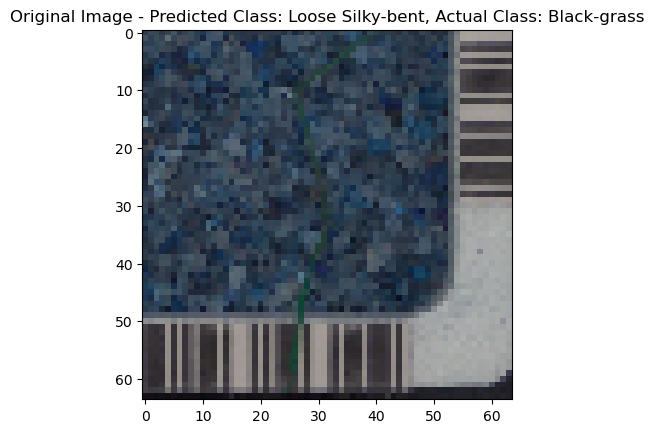

In [13]:
class_labels = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

test_image = X_test[100]
test_image_resized = cv2.resize(test_image, (64, 64))

print("Original Image Shape:", test_image.shape)
print('--------------------')

test_image_expanded = np.expand_dims(test_image_resized, axis=0)
test_image_normalized = test_image_expanded / 255.0 
result = loaded_model_1.predict(test_image_normalized)

print("Predicted Probabilities:", result[0])
print('--------------------')
sorted_indices = np.argsort(result[0])[::-1]

top5_probabilities = result[0][sorted_indices[:5]]
top5_classes = [class_labels[i] for i in sorted_indices[:5]]

for i, (probability, class_name) in enumerate(zip(top5_probabilities, top5_classes), 1):
    print(f"Top {i} - Class: {class_name}, Probability: {probability:.4f}")
    print('--------------------')

predicted_index = np.argmax(result[0])
predicted_class = class_labels[predicted_index]
print("Predicted Class:", predicted_class)
print('--------------------')

actual_index = Y_test[100]
actual_class = class_labels[actual_index]
print("Actual Class:", actual_class)
print('--------------------')

plt.imshow(test_image)
plt.title(f"Original Image - Predicted Class: {predicted_class}, Actual Class: {actual_class}")
plt.show()

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:cyan;">Our model exhibits the second-highest probability of correctly predicting the specific plant species as Black-grass, indicating the robustness and effectiveness of our well-constructed model.

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:cyan;"> Part B
* DOMAIN: Botanical Research
* CONTEXT: University X is currently undergoing some research involving understanding the characteristics of flowers. They already have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo.
* DATA DESCRIPTION: The dataset comprises of images from 17 plant species.
* PROJECT OBJECTIVE: To experiment with various approaches to train an image classifier to predict type of flower from the image.

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 1.A.Import and read oxflower17 dataset from tflearn and split into X and Y while loading

In [14]:
!pip install tensorflow-datasets
import sys
sys.path.append("C:\\Users\\SAIF\\AppData\\Roaming\\Python\\Python311\\site-packages")

In [15]:
import tensorflow_datasets as tfds
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [16]:
dataset, info = tfds.load('oxford_flowers102', split='train+test', with_info=True)

def preprocess_data(sample):
    image = tf.image.resize(sample['image'], (64, 64)) 
    image = tf.cast(image, tf.float32) / 255.0  
    label = sample['label']
    return image, label

dataset = dataset.map(preprocess_data)
X = [image.numpy() for image, label in dataset]
Y = [label.numpy() for image, label in dataset]
X = np.array(X)
Y = np.array(Y)

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 1.B.Print Number of images and shape of the images.

In [17]:
print("Number of images:", len(X))
print("Shape of images:", X.shape)

Number of images: 7169
Shape of images: (7169, 64, 64, 3)


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 1.C.Print count of each class from y

In [18]:
unique_classes, class_counts = np.unique(Y, return_counts=True)

for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} samples")

Class 0: 30 samples
Class 1: 50 samples
Class 2: 30 samples
Class 3: 46 samples
Class 4: 55 samples
Class 5: 35 samples
Class 6: 30 samples
Class 7: 75 samples
Class 8: 36 samples
Class 9: 35 samples
Class 10: 77 samples
Class 11: 77 samples
Class 12: 39 samples
Class 13: 38 samples
Class 14: 39 samples
Class 15: 31 samples
Class 16: 75 samples
Class 17: 72 samples
Class 18: 39 samples
Class 19: 46 samples
Class 20: 30 samples
Class 21: 49 samples
Class 22: 81 samples
Class 23: 32 samples
Class 24: 31 samples
Class 25: 31 samples
Class 26: 30 samples
Class 27: 56 samples
Class 28: 68 samples
Class 29: 75 samples
Class 30: 42 samples
Class 31: 35 samples
Class 32: 36 samples
Class 33: 30 samples
Class 34: 33 samples
Class 35: 65 samples
Class 36: 98 samples
Class 37: 46 samples
Class 38: 31 samples
Class 39: 57 samples
Class 40: 117 samples
Class 41: 49 samples
Class 42: 120 samples
Class 43: 83 samples
Class 44: 30 samples
Class 45: 186 samples
Class 46: 57 samples
Class 47: 61 samples

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 2.A.Display 5 random images.

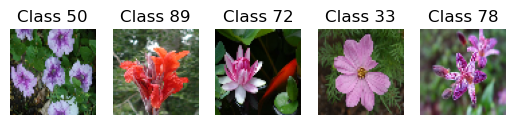

In [19]:
random_indices = np.random.choice(len(X), 5, replace=False)

for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[index])
    plt.title(f"Class {Y[index]}")
    plt.axis('off')

plt.show()

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 2.B.Select any image from the dataset and assign it to a variable

In [20]:
index_to_select = 6000

selected_image = X[index_to_select]
selected_label = Y[index_to_select]

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 2.C.Transform the image into grayscale format and display the same.

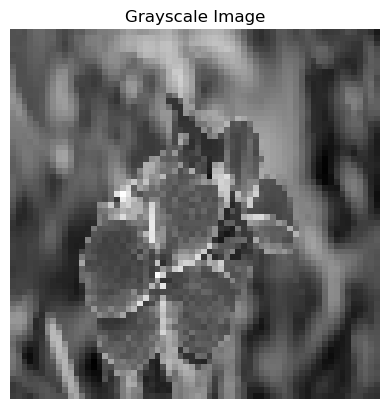

In [21]:
grayscale_image = cv2.cvtColor(selected_image, cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.show()

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 2.D.Apply a filter to sharpen the image and display the image before and after sharpening

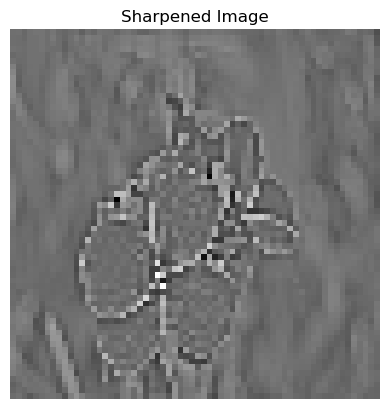

In [22]:
def sharpen_image(image):
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

sharpened_image = sharpen_image(grayscale_image)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.show()

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 2.E.Apply a filter to blur the image and display the image before and after blur.

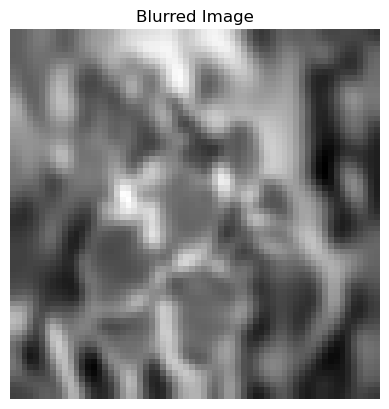

In [23]:
def blur_image(image, kernel_size=(5, 5)):
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image

blurred_image = blur_image(grayscale_image)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')

plt.show()

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 2.F.Display all the 4 images from above questions besides each other to observe the difference.

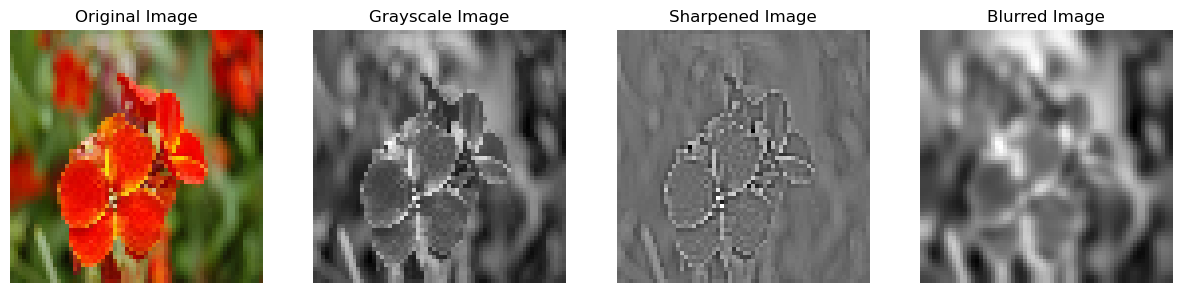

In [24]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(selected_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')

plt.show()

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 3.A.Split the data into train and test with 80:20 proportion.

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (5735, 64, 64, 3)
Y_train shape: (5735,)
X_test shape: (1434, 64, 64, 3)
Y_test shape: (1434,)


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 3.B.Train a model using any Supervised Learning algorithm and share performance metrics on test data.

In [26]:
num_samples, height, width, channels = X_train.shape
X_train_2d = X_train.reshape((num_samples, height * width * channels))
num_samples_test, height_test, width_test, channels_test = X_test.shape
X_test_2d = X_test.reshape((num_samples_test, height_test * width_test * channels_test))

myList = list(range(1, 100))
scores = []

for k in myList:
    knn_model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_model.fit(X_train_2d, Y_train)
    Y_pred = knn_model.predict(X_test_2d)
    accuracy = accuracy_score(Y_test, Y_pred)
    scores.append(accuracy)

print(f"Scores: {scores}")
print(' ')
print(' ')
MSE = [1 - x for x in scores]
optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number for k is %d" % optimal_k)

Scores: [0.15620641562064155, 0.15620641562064155, 0.16108786610878661, 0.15620641562064155, 0.15690376569037656, 0.15760111576011157, 0.1596931659693166, 0.15760111576011157, 0.16108786610878661, 0.15760111576011157, 0.15760111576011157, 0.15620641562064155, 0.15271966527196654, 0.15132496513249652, 0.1506276150627615, 0.15550906555090654, 0.15341701534170155, 0.15132496513249652, 0.15132496513249652, 0.1492329149232915, 0.14644351464435146, 0.14853556485355648, 0.14644351464435146, 0.14504881450488144, 0.1401673640167364, 0.14435146443514643, 0.14504881450488144, 0.14435146443514643, 0.14295676429567644, 0.14295676429567644, 0.14295676429567644, 0.1394700139470014, 0.1401673640167364, 0.1394700139470014, 0.1387726638772664, 0.13668061366806136, 0.13807531380753138, 0.13807531380753138, 0.14086471408647142, 0.14225941422594143, 0.14086471408647142, 0.14156206415620642, 0.13598326359832635, 0.13249651324965134, 0.13179916317991633, 0.13110181311018132, 0.1304044630404463, 0.13179916317

In [27]:
knn_model = KNeighborsClassifier(n_neighbors = 3,weights = 'distance')
knn_model.fit(X_train_2d, Y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [28]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    actual_series = pd.Series(actual)
    
    for i in np.sort(actual_series.unique()):
        try:
            a.loc[i, 'total_instances'] = len(actual_series[actual_series == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual_series == i]).value_counts()[i]
            a.loc[i, '%'] = round(100 * pd.Series(predictions[actual_series == i]).value_counts()[i] / len(actual_series[actual_series == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    
    return a

y_pred2 = knn_model.predict(X_test_2d)
pred_vs_actual_model = rightly_identified(Y_test, y_pred2)
print('Score for Training Data : ', knn_model.score(X_train_2d, Y_train))
print(' ')
print('Score for Testing Data : ', round(knn_model.score(X_test_2d, Y_test), 2))
print('--------------------')
print(accuracy_score(Y_test, y_pred2))
print('--------------------')
print(classification_report(Y_test, y_pred2))

Score for Training Data :  1.0
 
Score for Testing Data :  0.16
--------------------
0.16108786610878661
--------------------
              precision    recall  f1-score   support

           0       0.03      0.25      0.06         4
           1       0.58      0.58      0.58        12
           2       1.00      0.09      0.17        11
           3       0.00      0.00      0.00         6
           4       0.50      0.29      0.37        17
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         7
           7       0.50      0.08      0.14        12
           8       0.00      0.00      0.00         9
           9       0.33      0.11      0.17         9
          10       0.50      0.05      0.09        20
          11       0.30      0.30      0.30        10
          12       1.00      0.09      0.17        11
          13       0.16      0.30      0.21        10
          14       0.00      0.00      0.00         9
         

C:\Users\SAIF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
pred_vs_actual_model

,total_instances,identified_right,%
0,4.0,1.0,25.0
1,12.0,7.0,58.3
2,11.0,1.0,9.1
3,6.0,NaN,0.0
4,17.0,5.0,29.4
...,...,...,...
97,19.0,2.0,10.5
98,13.0,NaN,0.0
99,10.0,NaN,0.0
100,9.0,1.0,11.1


In [30]:
def con_matrix(actual, predictions):
    from sklearn.metrics import confusion_matrix
    matrix = pd.DataFrame(confusion_matrix(actual, predictions), columns = np.unique(actual), index = np.unique(actual))
    matrix.loc[:,'total_count_actual_class'] = matrix.sum(axis = 1)
    matrix.loc['total_count_predicted'] = matrix.sum(axis = 0)
    return matrix

con_matrix(Y_test, y_pred2)

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,total_count_actual_class
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
1,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,9
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 3.C.Train a model using Neural Network and share performance metrics on test data

In [31]:
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)
output_dim = len(label_encoder.classes_)

X_train_2d = X_train_2d / 255.0  
X_test_2d = X_test_2d / 255.0

X_train_2d = X_train_2d.reshape((X_train_2d.shape[0], 64, 64, 3))
X_test_2d = X_test_2d.reshape((X_test_2d.shape[0], 64, 64, 3))

Y_train_encoded = to_categorical(Y_train_encoded, num_classes=output_dim)
Y_test_encoded = to_categorical(Y_test_encoded, num_classes=output_dim)

input_shape = (64, 64, 3)

model_2 = Sequential()
model_2.add(Flatten(input_shape=input_shape))  
model_2.add(Dense(units=500, kernel_initializer='he_normal'))
model_2.add(LeakyReLU(alpha=0.01))
model_2.add(Dropout(0.5))
model_2.add(Dense(300, kernel_initializer='he_normal'))
model_2.add(LeakyReLU(alpha=0.01))
model_2.add(Dropout(0.5))
model_2.add(Dense(200, kernel_initializer='he_normal'))
model_2.add(LeakyReLU(alpha=0.01))
model_2.add(Dropout(0.5))
model_2.add(Dense(units=output_dim, activation='softmax', kernel_initializer='glorot_normal'))

adam_optimizer = Adam(learning_rate=0.01)
model_2.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history_model_2 = model_2.fit(X_train_2d, Y_train_encoded,
                              validation_data=(X_test_2d, Y_test_encoded),
                              epochs=25,
                              batch_size=128,
                              callbacks=[early_stopping, reduce_lr],
                              verbose=1)

Epoch 1/25
45/45 [==============================] - 7s 133ms/step - loss: 4.5442 - accuracy: 0.0295 - val_loss: 4.4261 - val_accuracy: 0.0544 - lr: 0.0100
Epoch 2/25
45/45 [==============================] - 6s 127ms/step - loss: 4.2788 - accuracy: 0.0554 - val_loss: 3.9832 - val_accuracy: 0.0760 - lr: 0.0100
Epoch 3/25
45/45 [==============================] - 6s 127ms/step - loss: 4.0411 - accuracy: 0.0638 - val_loss: 3.8210 - val_accuracy: 0.0927 - lr: 0.0100
Epoch 4/25
45/45 [==============================] - 6s 128ms/step - loss: 3.9605 - accuracy: 0.0704 - val_loss: 3.6789 - val_accuracy: 0.1199 - lr: 0.0100
Epoch 5/25
45/45 [==============================] - 6s 127ms/step - loss: 3.8648 - accuracy: 0.0793 - val_loss: 3.6315 - val_accuracy: 0.1137 - lr: 0.0100
Epoch 6/25
45/45 [==============================] - 6s 127ms/step - loss: 3.8116 - accuracy: 0.0828 - val_loss: 3.5935 - val_accuracy: 0.1199 - lr: 0.0100
Epoch 7/25
45/45 [==============================] - 6s 127ms/step - lo

In [32]:
y_pred_2 = model_2.predict(X_test_2d)
y_test_labels_model_2 = np.argmax(Y_test_encoded, axis=1)
y_pred_labels_model_2 = np.argmax(y_pred_2, axis=1)
cm2 = confusion_matrix(y_test_labels_model_2, y_pred_labels_model_2)
print(cm2)
print('---------------------------------')
accuracy_model2 = np.sum(np.diag(cm2)) / np.sum(cm2)
print(f"Accuracy: {accuracy_model2 * 100:.2f}%")

45/45 [==============================] - 0s 6ms/step
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
---------------------------------
Accuracy: 16.81%


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 3.D.Train a model using a basic CNN and share performance metrics on test data

In [33]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(output_dim, activation='softmax'))

adam_optimizer = Adam(learning_rate=0.001)
model_cnn.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history_cnn = model_cnn.fit(X_train_2d, Y_train_encoded,
                            validation_data=(X_test_2d, Y_test_encoded),
                            epochs=25, batch_size=64,
                            callbacks=[early_stopping, reduce_lr],
                            verbose=1)

Epoch 1/25
90/90 [==============================] - 12s 120ms/step - loss: 4.5497 - accuracy: 0.0300 - val_loss: 4.4924 - val_accuracy: 0.0342 - lr: 0.0010
Epoch 2/25
90/90 [==============================] - 10s 115ms/step - loss: 4.4983 - accuracy: 0.0312 - val_loss: 4.4890 - val_accuracy: 0.0342 - lr: 0.0010
Epoch 3/25
90/90 [==============================] - 10s 115ms/step - loss: 4.4913 - accuracy: 0.0323 - val_loss: 4.4828 - val_accuracy: 0.0404 - lr: 0.0010
Epoch 4/25
90/90 [==============================] - 10s 115ms/step - loss: 4.4849 - accuracy: 0.0326 - val_loss: 4.4880 - val_accuracy: 0.0404 - lr: 0.0010
Epoch 5/25
90/90 [==============================] - 10s 114ms/step - loss: 4.4856 - accuracy: 0.0335 - val_loss: 4.4810 - val_accuracy: 0.0404 - lr: 0.0010
Epoch 6/25
90/90 [==============================] - 10s 115ms/step - loss: 4.4807 - accuracy: 0.0330 - val_loss: 4.4864 - val_accuracy: 0.0404 - lr: 0.0010
Epoch 7/25
90/90 [==============================] - 10s 115ms/st

In [34]:
y_pred_cnn = np.argmax(model_cnn.predict(X_test_2d), axis=1)
accuracy_cnn = accuracy_score(np.argmax(Y_test_encoded, axis=1), y_pred_cnn)
classification_report_cnn = classification_report(np.argmax(Y_test_encoded, axis=1), y_pred_cnn)
confusion_matrix_cnn = confusion_matrix(np.argmax(Y_test_encoded, axis=1), y_pred_cnn)

print(f"Accuracy: {accuracy_cnn}")
print('---------------------------------')
print("\nClassification Report:\n", classification_report_cnn)

45/45 [==============================] - 1s 15ms/step
Accuracy: 0.19177126917712692
---------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.42      0.59        12
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        17
           5       0.25      0.33      0.29         3
           6       0.00      0.00      0.00         7
           7       0.42      0.67      0.52        12
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         9
          10       1.00      0.05      0.10        20
          11       0.00      0.00      0.00        10
          12       1.00      0.09      0.17        11
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00   

C:\Users\SAIF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:cyan;">Model Comparision

In [35]:
num_samples_train, height_train, width_train, channels_train = X_train.shape
X_train_2d = X_train.reshape((num_samples_train, height_train * width_train * channels_train))
num_samples_test, height_test, width_test, channels_test = X_test.shape
X_test_2d = X_test.reshape((num_samples_test, height_test * width_test * channels_test))

# Data for Model 1
model1_data = {
    'Model': ['Model 1'],
    'Train Accuracy': [knn_model.score(X_train_2d, Y_train)],
    'Test Accuracy': [round(knn_model.score(X_test_2d, Y_test), 2)],
    'Train Loss': [None], 
    'Test Loss': [None] 
}



# Data for Model 2
model2_data = {
    'Model': ['Model 2'],
    'Train Accuracy': [history_model_2.history['accuracy'][-1]],
    'Test Accuracy': [history_model_2.history['val_accuracy'][-1]],
    'Train Loss': [history_model_2.history['loss'][-1]],
    'Test Loss': [history_model_2.history['val_loss'][-1]]
}

# Data for Model 3
model3_data = {
    'Model': ['Model 3'],
    'Train Accuracy': [history_cnn.history['accuracy'][-1]],
    'Test Accuracy': [history_cnn.history['val_accuracy'][-1]],
    'Train Loss': [history_cnn.history['loss'][-1]],
    'Test Loss': [history_cnn.history['val_loss'][-1]]
}

df_model1 = pd.DataFrame(model1_data)
df_model2 = pd.DataFrame(model2_data)
df_model3 = pd.DataFrame(model3_data)
df_comparison = pd.concat([df_model1, df_model2, df_model3], ignore_index=True)
df_comparison

,Model,Train Accuracy,Test Accuracy,Train Loss,Test Loss
0,Model 1,1.000000,0.160000,None,None
1,Model 2,0.133391,0.168061,3.493805,3.255769
2,Model 3,0.167393,0.191771,3.365378,3.24597



##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:cyan;">Despite the suboptimal performance of all three models, Model 2(ANN Model) demonstrated the most favorable results among them.

##### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:pink;"> 3.E.Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label

In [37]:
model_2.save('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part B//Part_B_ANN_Model.h5') 
model_2.save_weights('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part B//Part_B_ANN_Model_weights.h5') 
model_cnn.save('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part B//Part_B_CNN_Model.h5') 
model_cnn.save_weights('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part B//Part_B_CNN_Model_weights.h5') 

loaded_model_2 = load_model('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part B//Part_B_ANN_Model.h5')
loaded_model_2.load_weights('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part B//Part_B_ANN_Model_weights.h5')
loaded_model_3 = load_model('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part B//Part_B_CNN_Model.h5')
loaded_model_3.load_weights('C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Model,Weights/Part B//Part_B_CNN_Model_weights.h5')

C:\Users\SAIF\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 47ms/step


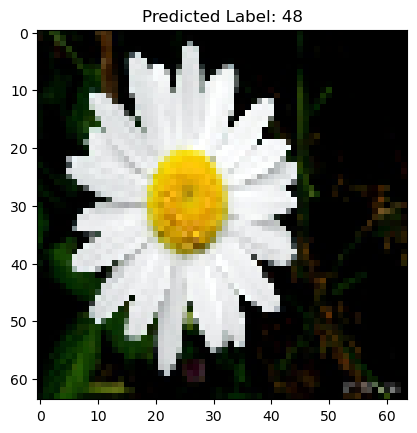

In [42]:
img_path = 'C:/Users/SAIF/Desktop/Great Learning/Computer Vision(CV)/Project 2/Prediction-1 (1).jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = loaded_model_2.predict(img_array)

top5_indices = np.argsort(predictions[0])[::-1][:5]
top5_probabilities = predictions[0][top5_indices]
top5_classes = label_encoder.classes_[top5_indices]
plt.imshow(img)
plt.title(f"Predicted Label: {top5_classes[0]}")
plt.show()